In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [4]:
data= fetch_california_housing()

In [5]:
df=pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
x=df
y=data.target

In [10]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
y.shape

(20640,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
mse= cross_val_score(reg, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [19]:
mse

array([-0.52006533, -0.50229277, -0.52054451, -0.50789718, -0.54552622])

In [20]:
reg.fit(x_train, y_train)
reg_pred=reg.predict(x_test)

In [21]:
reg_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [22]:
import seaborn as sns

c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


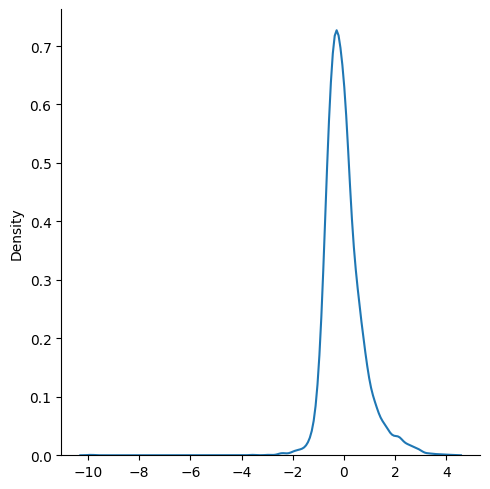

In [23]:
sns.displot(y_test-reg_pred, kind='kde')

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, reg_pred)
r2 = r2_score(y_test, reg_pred)

In [25]:
mse

0.5558915986952444

In [26]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

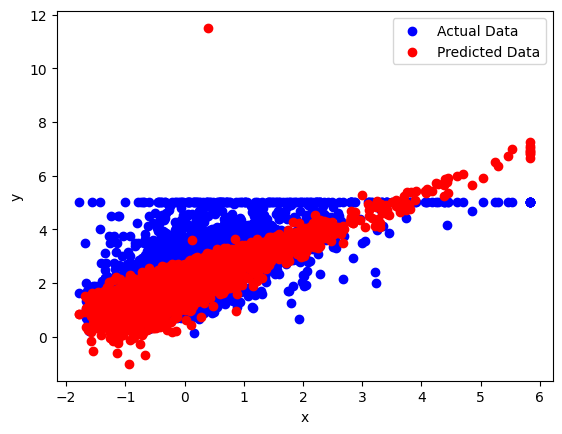

In [27]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_test[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(x_test[:, 0], reg_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()

In [28]:
# ridge regression

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [30]:
ridge = Ridge()
ridge_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(x_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [31]:
ridge_grid.best_params_

{'alpha': 0.1}

In [32]:
output=ridge_grid.predict(x_test)

In [33]:
ridge_grid.best_score_

-0.5192651994657133

c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


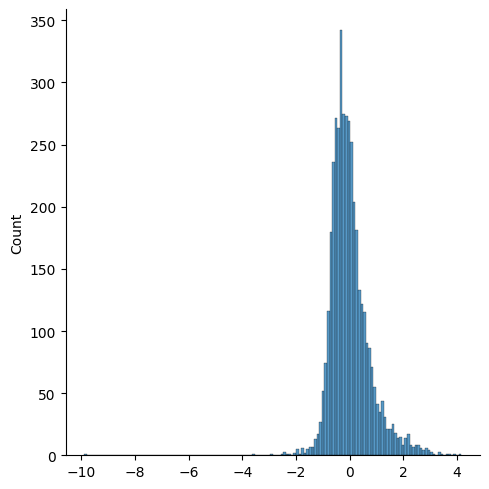

In [34]:
import seaborn as sns
sns.displot(y_test-output, kind='hist')

In [35]:
score=r2_score(y_test, output)

In [36]:
score

0.5757905180002315

In [37]:
# lassso regression

In [38]:
from sklearn.linear_model import Lasso  

In [39]:
lasso = Lasso()
lasso_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(x_train, y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.001


In [40]:
output_lasso=lasso_grid.predict(x_test)

In [41]:
output_lasso

array([0.72592298, 1.76090866, 2.69570697, ..., 4.46264973, 1.19821254,
       2.00356126])

c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


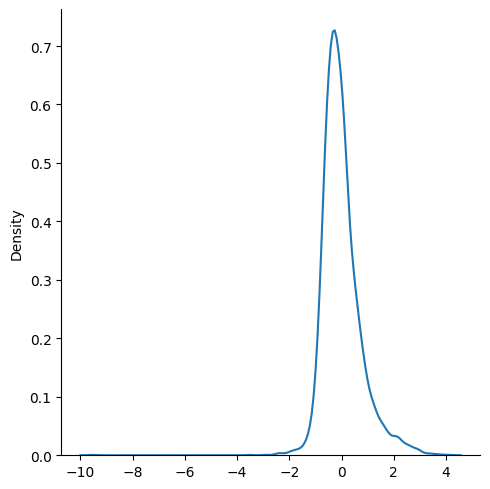

In [42]:
sns.displot(y_test-output_lasso, kind='kde')

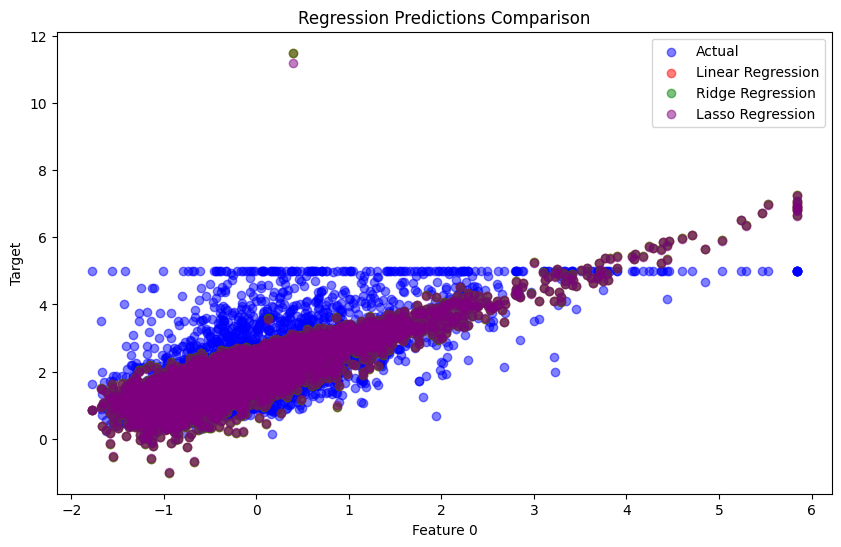

In [43]:


plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(x_test[:, 0], reg_pred, color='red', label='Linear Regression', alpha=0.5)
plt.scatter(x_test[:, 0], output, color='green', label='Ridge Regression', alpha=0.5)
plt.scatter(x_test[:, 0], output_lasso, color='purple', label='Lasso Regression', alpha=0.5)
plt.xlabel('Feature 0')
plt.ylabel('Target')
plt.legend()
plt.title('Regression Predictions Comparison')
plt.show()
